In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['axes.linewidth'] = 3
plt.rc("font", family="Bookman Old Style", weight="bold")
get_ipython().run_line_magic('matplotlib', 'inline')

In [3]:
data = pd.read_csv("enose_dataset\\data.csv", header=0, index_col=0)

In [5]:
X_MOS = data.iloc[:, 0:56]
X_CSA = data.iloc[:, 56:80]
y = data["VOC"]
gases = y.unique()

In [6]:
def boxplot_multi_analysis(X=None, y=None, feature=None,
                           orient="v", ylabel=None,
                           label_fontsize=15,
                           title_fontsize=20,
                           tick_fontsize=12,
                           tick_interval=5,
                           figsize=(15, 7)):
    data = X.filter(regex="_" + feature, axis=1)
    number_of_features = len(data.columns)
    if orient == "h":
        figure, axs = plt.subplots(
            nrows=2, ncols=number_of_features//2,
            figsize=figsize, sharex=True, sharey=True,
            dpi=300)
    else:
        figure, axs = plt.subplots(
            nrows=number_of_features//2, ncols=2,
            figsize=figsize, sharex=True, sharey=True,
            dpi=300)
    for ax, col in zip(axs.flat, data.columns):
        sns.boxplot(ax=ax,
                    x=y,
                    y=data[col],
                    showfliers=False
                    )
        ax.set_ylabel(ylabel,
                      fontsize=label_fontsize,
                      fontweight="bold")
        ax.set_yticks(abs(
            np.arange(0,
                      abs(ax.get_ylim()[1]) + tick_interval,
                      tick_interval)))
        ax.set_yticklabels(ax.get_yticks(), fontsize=tick_fontsize)
        ax.set_xlabel("Compounds", fontsize=label_fontsize,
                      fontweight="bold")
        ax.set_xticks(ax.get_xticks())
        ax.set_xticklabels(
            gases, fontsize=tick_fontsize, rotation=45)
        ax.set_title(
            col[:-1 * (len(feature)+1)],
            fontsize=title_fontsize,
            fontweight="bold")
        ax.grid(which="major", axis="y", color="black",
                linestyle="--", alpha=0.3)
    figure.tight_layout()

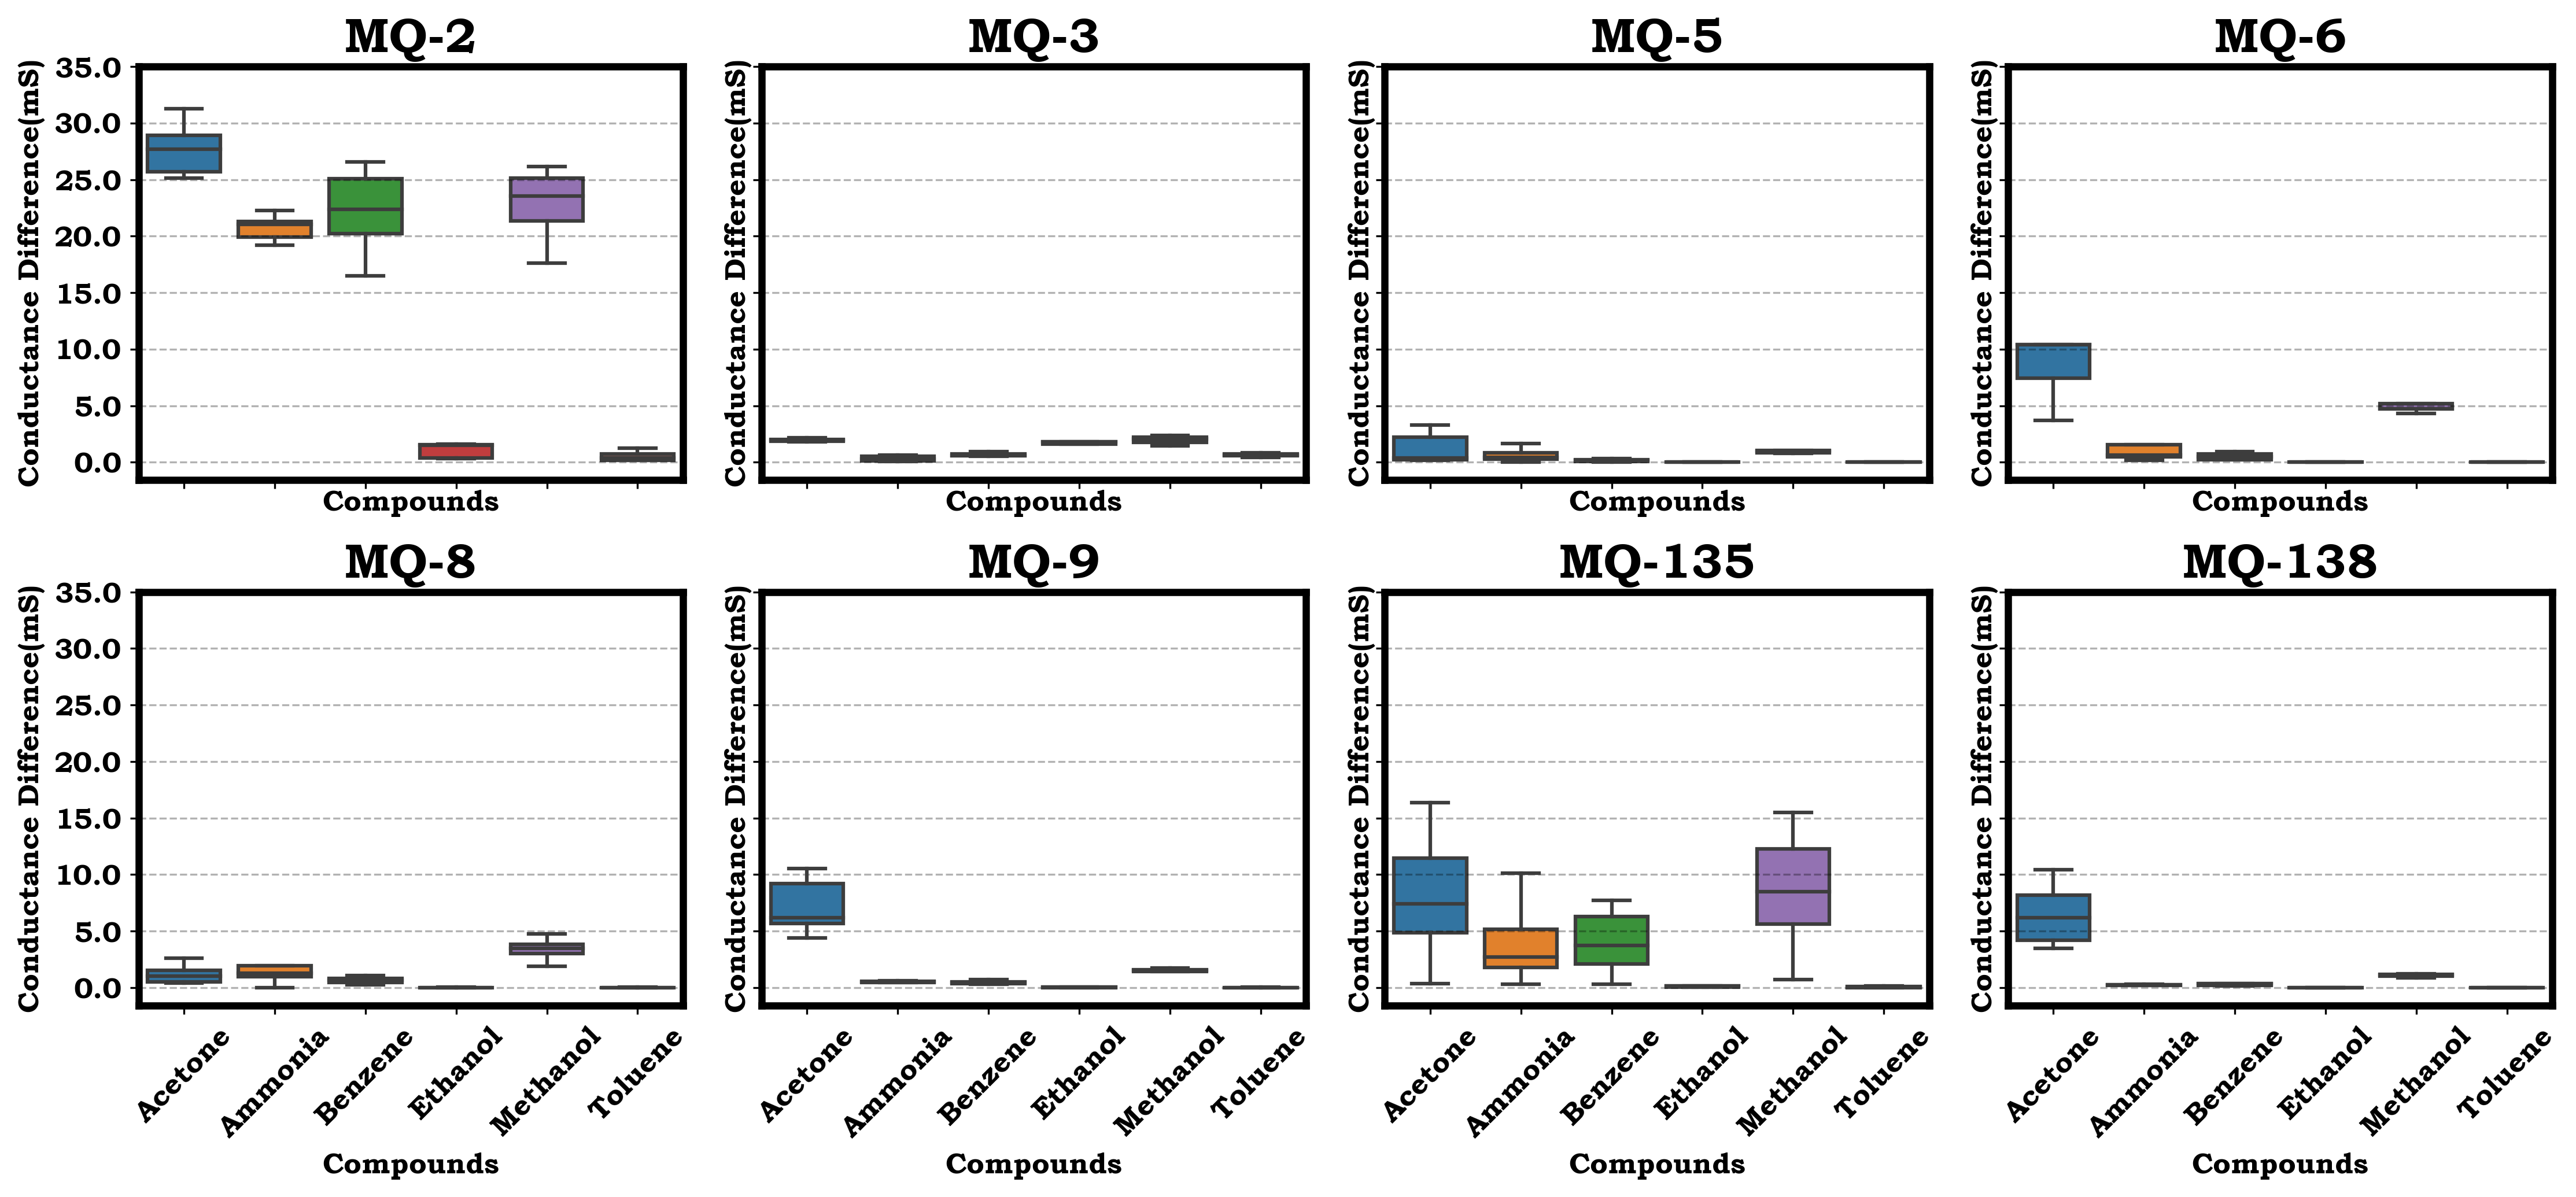

In [7]:
boxplot_multi_analysis(X=X_MOS, y=y,
                       feature="DG",
                       orient="h",
                       ylabel="Conductance Difference(mS)",
                       label_fontsize=12)

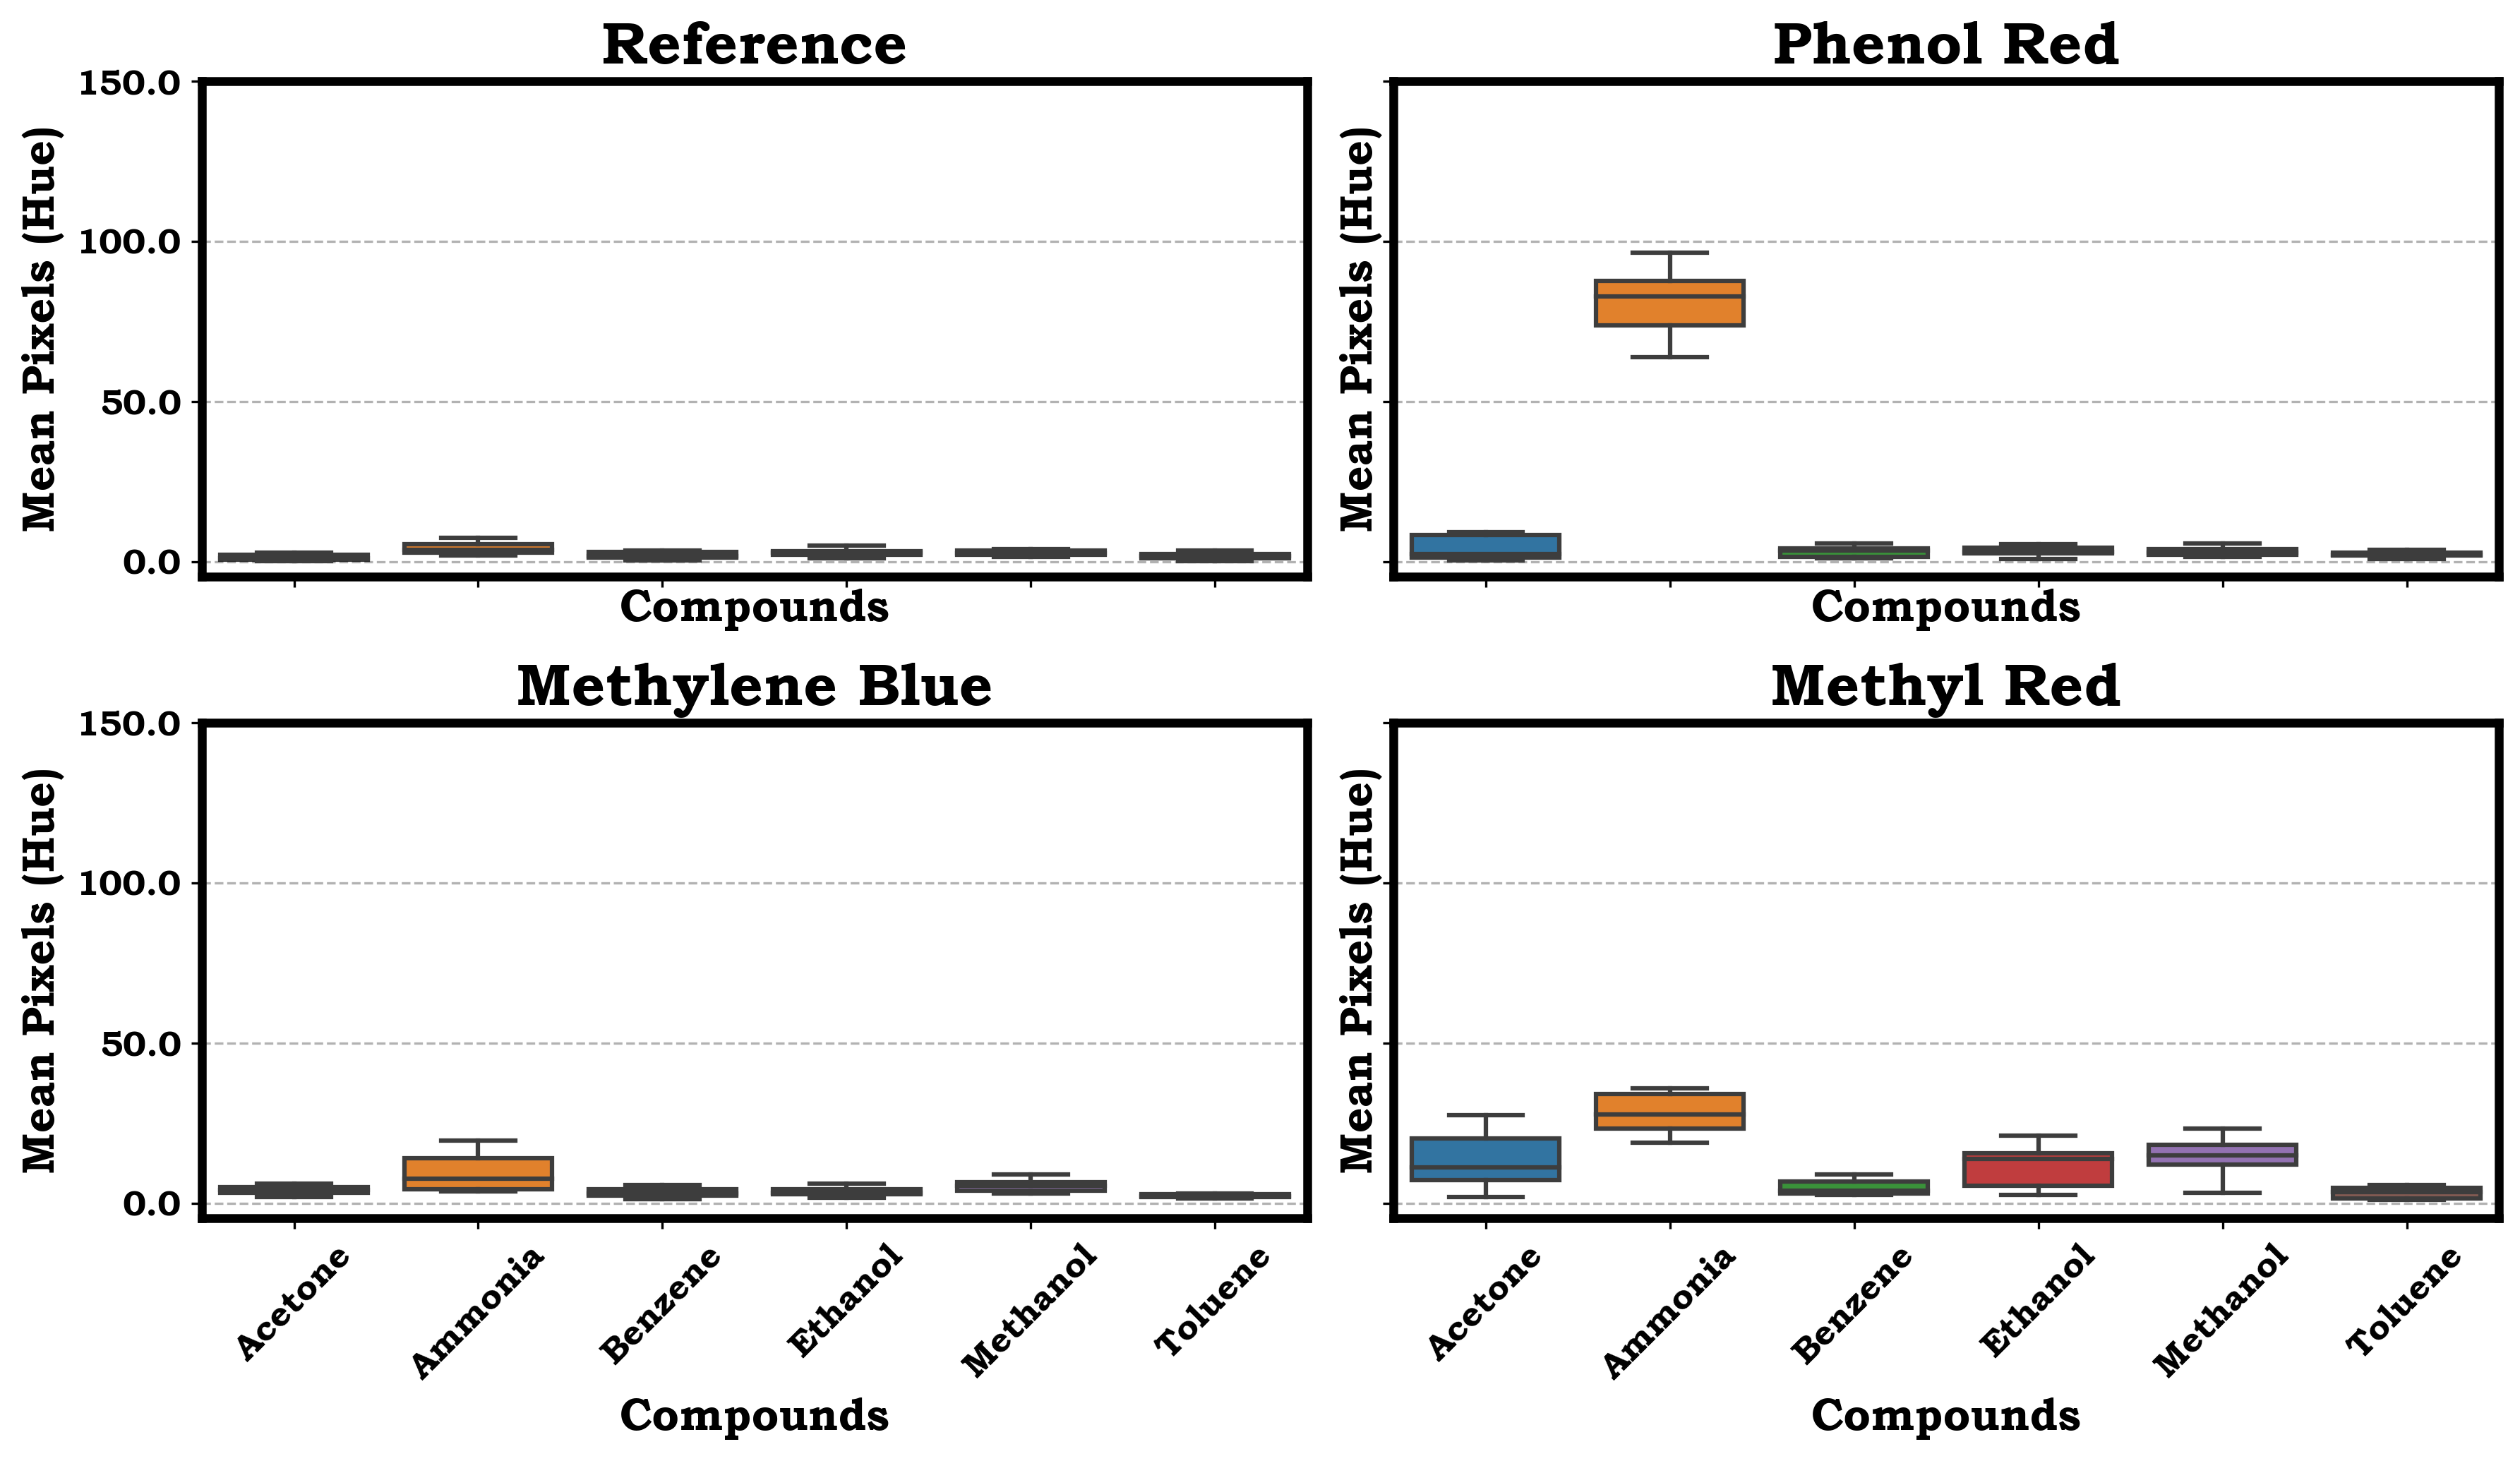

In [8]:
boxplot_multi_analysis(X=X_CSA, y=y, feature="Green",
                       orient="h", ylabel="Mean Pixels (Hue)",
                       label_fontsize=15,
                       tick_interval=50,
                       figsize=(12, 7))

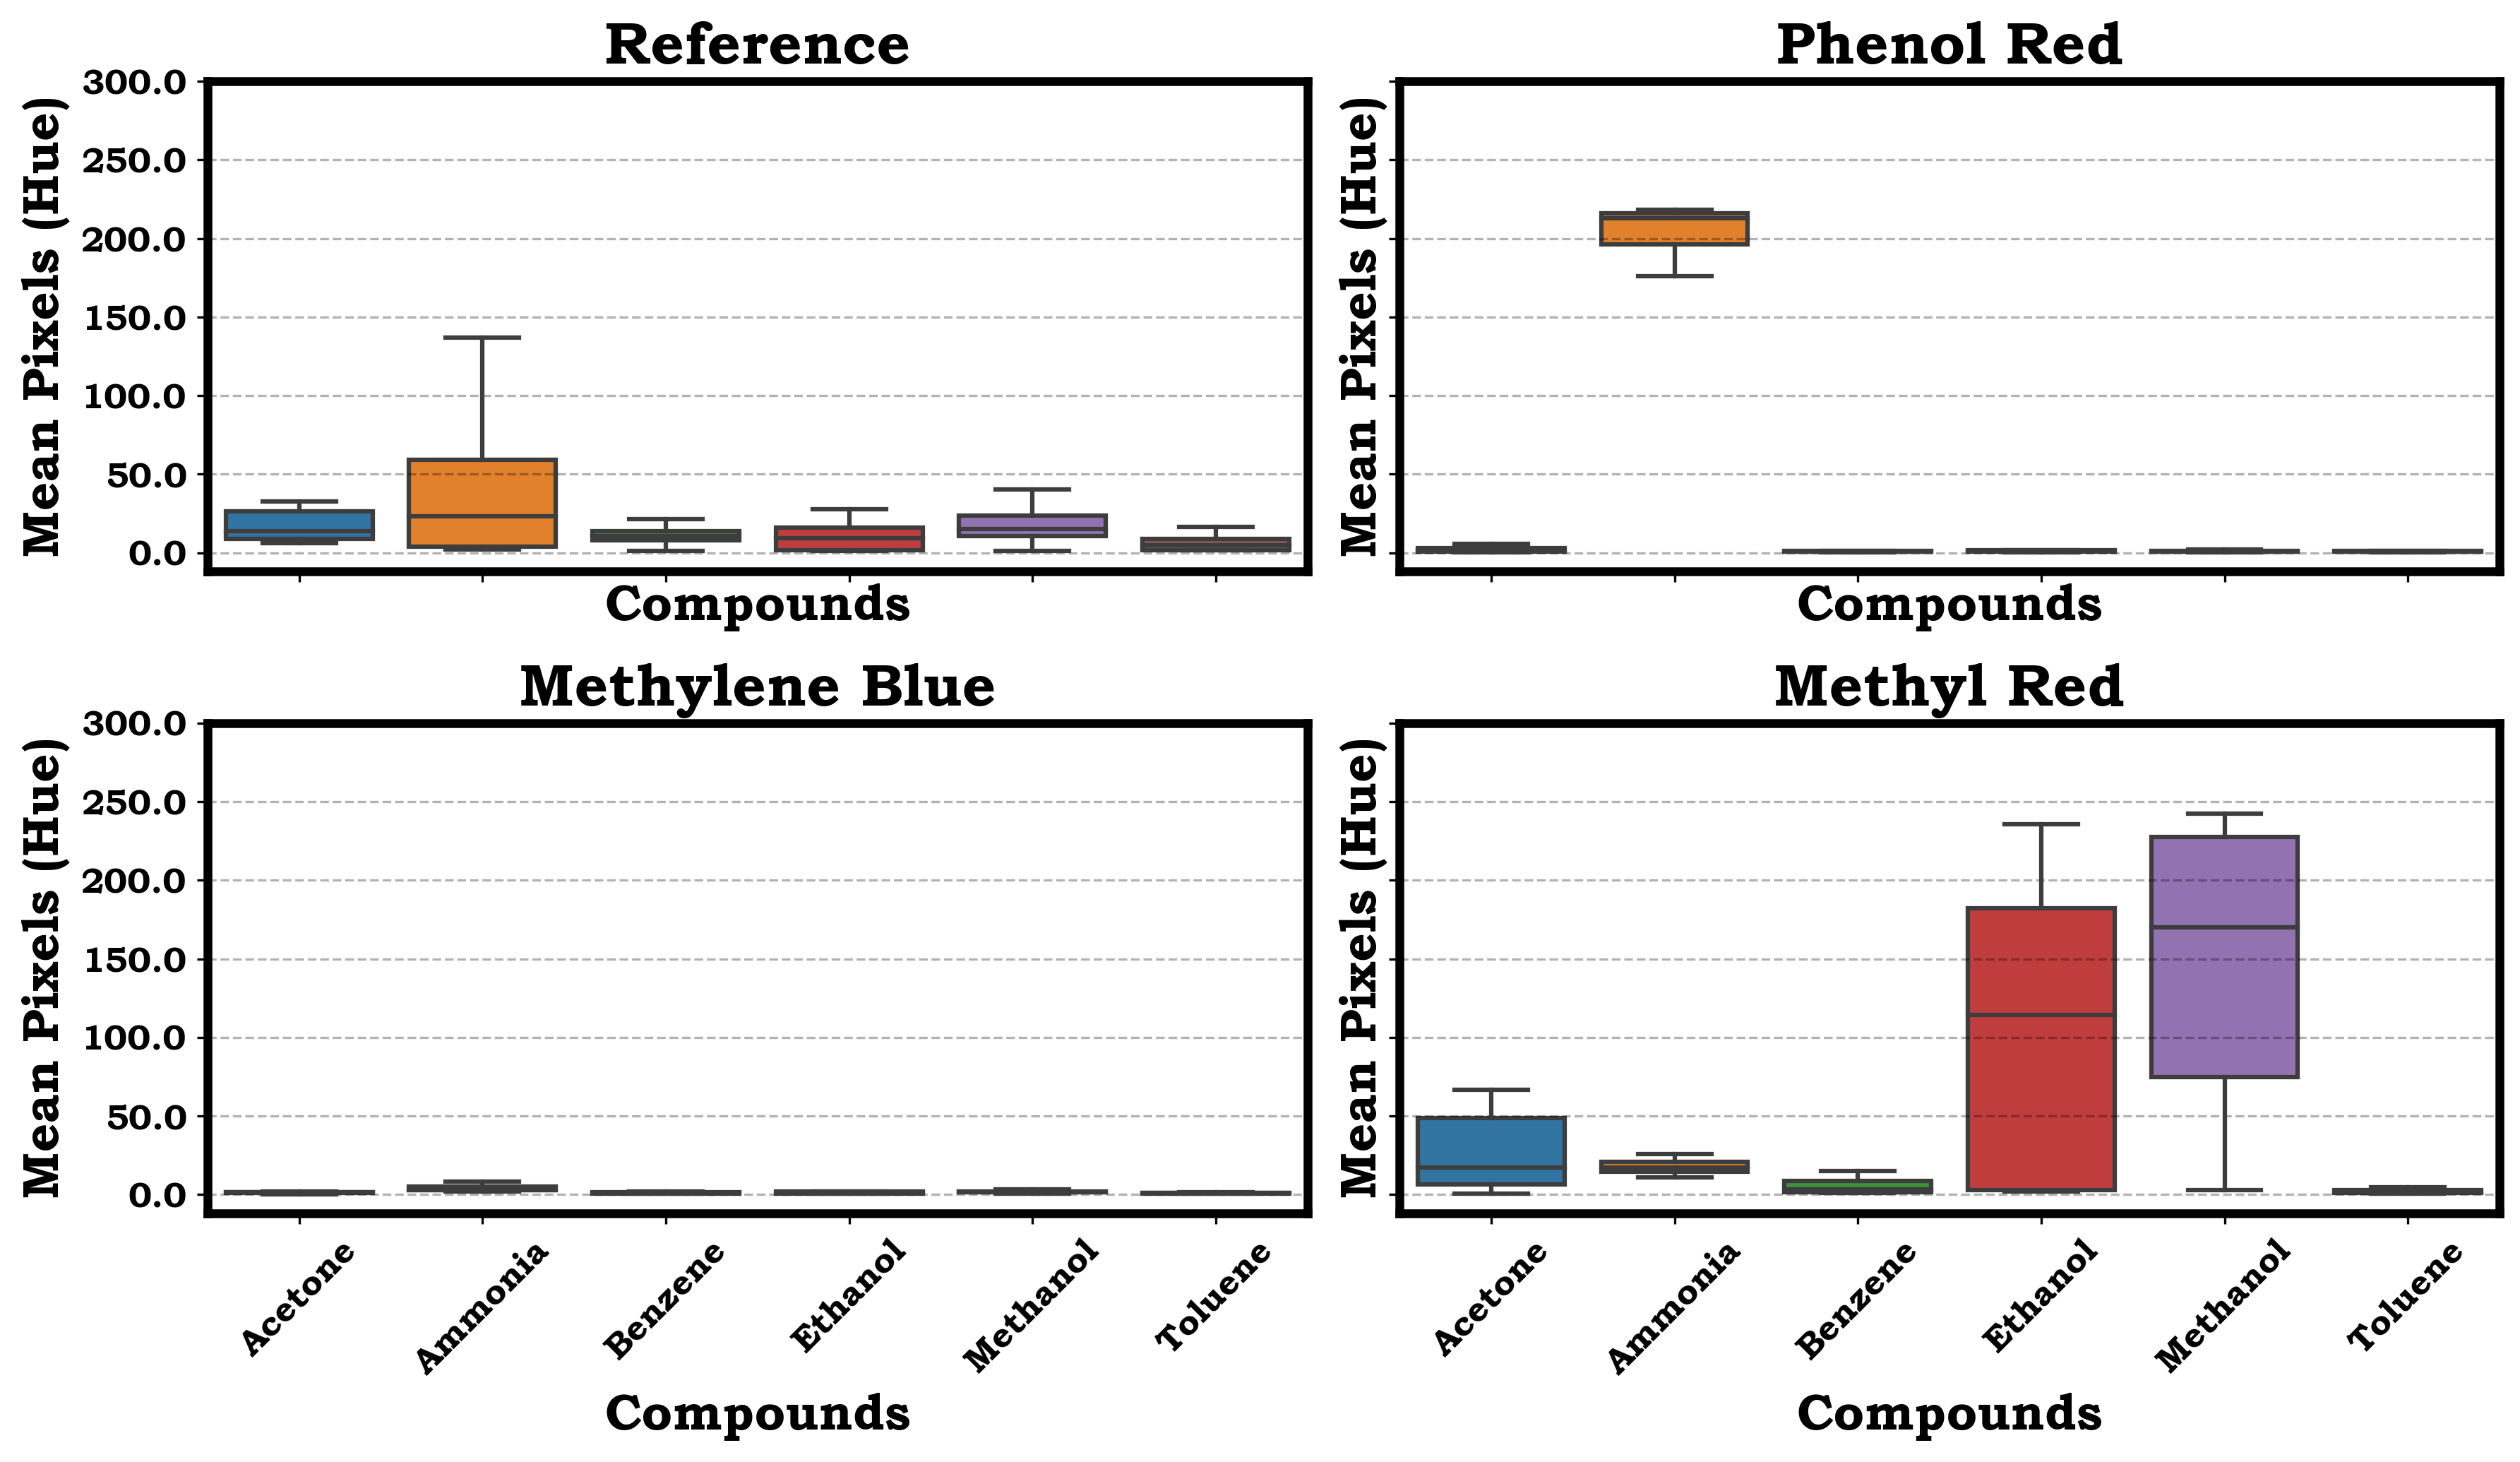

In [10]:
boxplot_multi_analysis(X=X_CSA, y=y, feature="Hue",
                       orient="h", ylabel="Mean Pixels (Hue)",
                       label_fontsize=17,
                       tick_interval=50,
                       figsize=(12, 7))

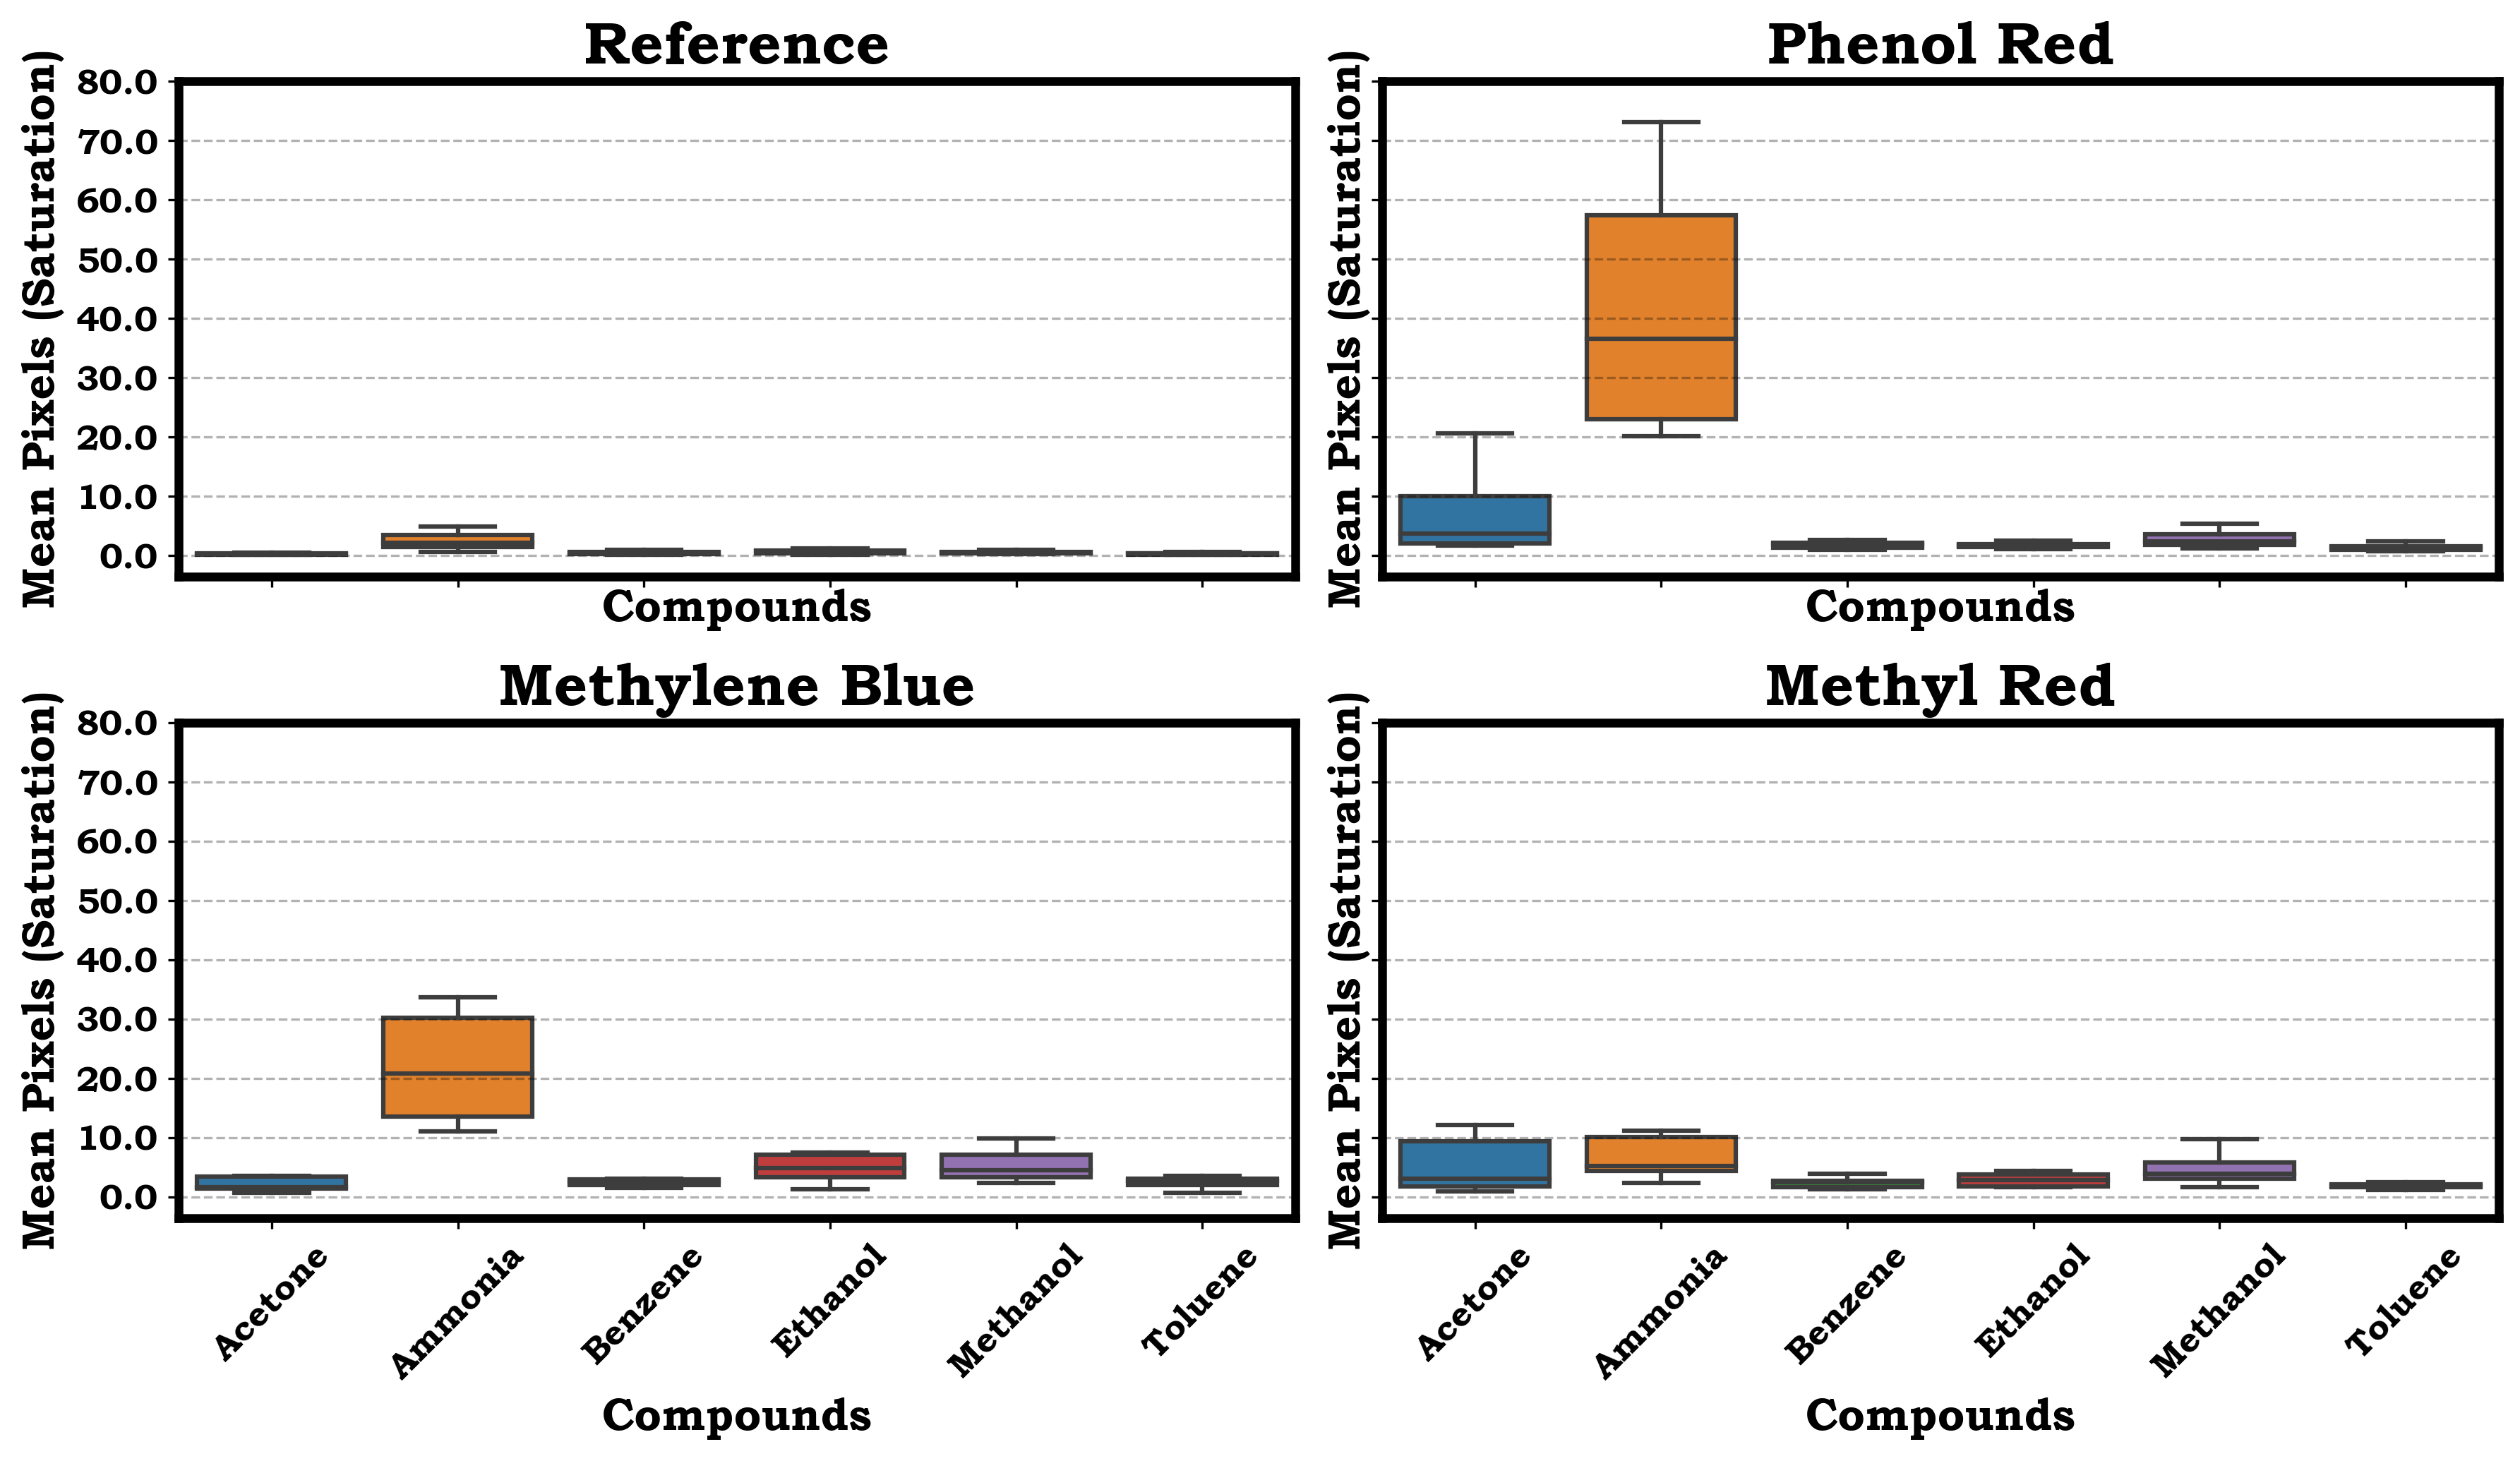

In [11]:
boxplot_multi_analysis(X=X_CSA, y=y,
                       feature="Saturation",
                       orient="h",
                       ylabel="Mean Pixels (Saturation)",
                       label_fontsize=15,
                       tick_interval=10,
                       figsize=(12, 7))

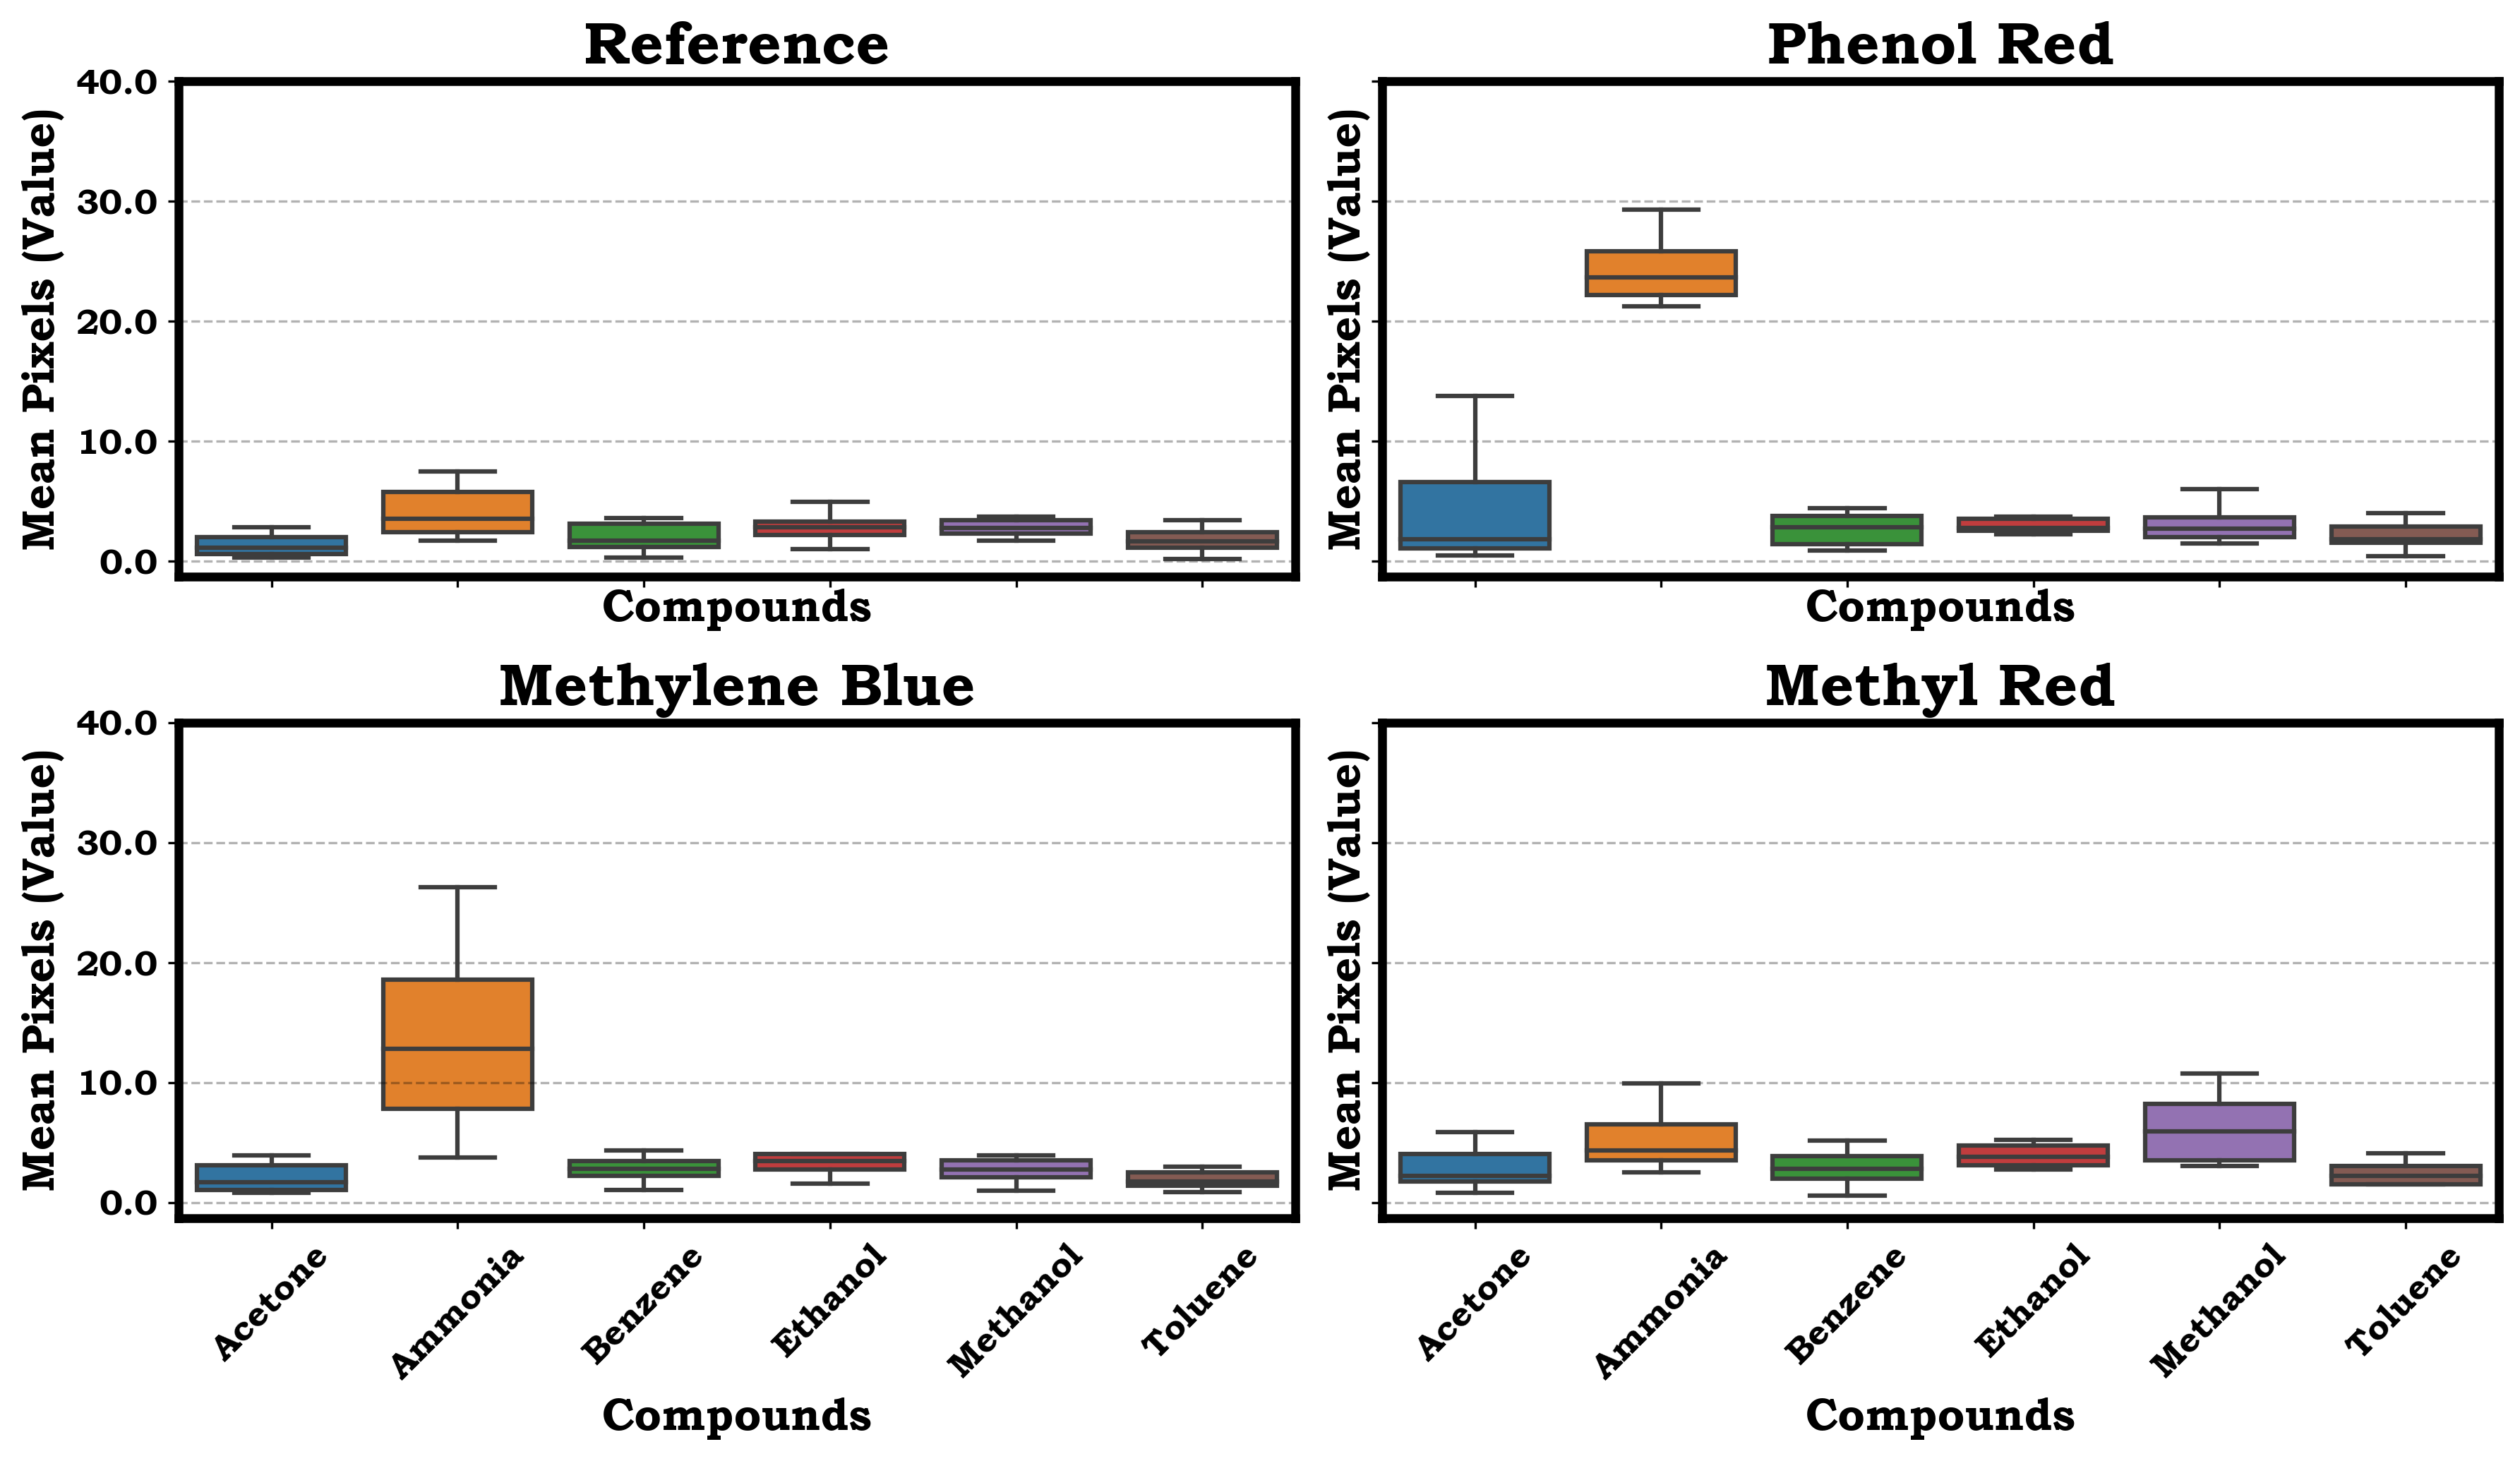

In [12]:
boxplot_multi_analysis(X=X_CSA, y=y,
                       feature="Value",
                       orient="h",
                       ylabel="Mean Pixels (Value)",
                       label_fontsize=15,
                       tick_interval=10,
                       figsize=(12, 7))